<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/Ridge_and_Lasso_Implementation_second_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [3]:
#Setting seed for reproducability
np.random.seed(10)

In [4]:
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [5]:
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [6]:
#Printing first 5 rows of the data
data.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


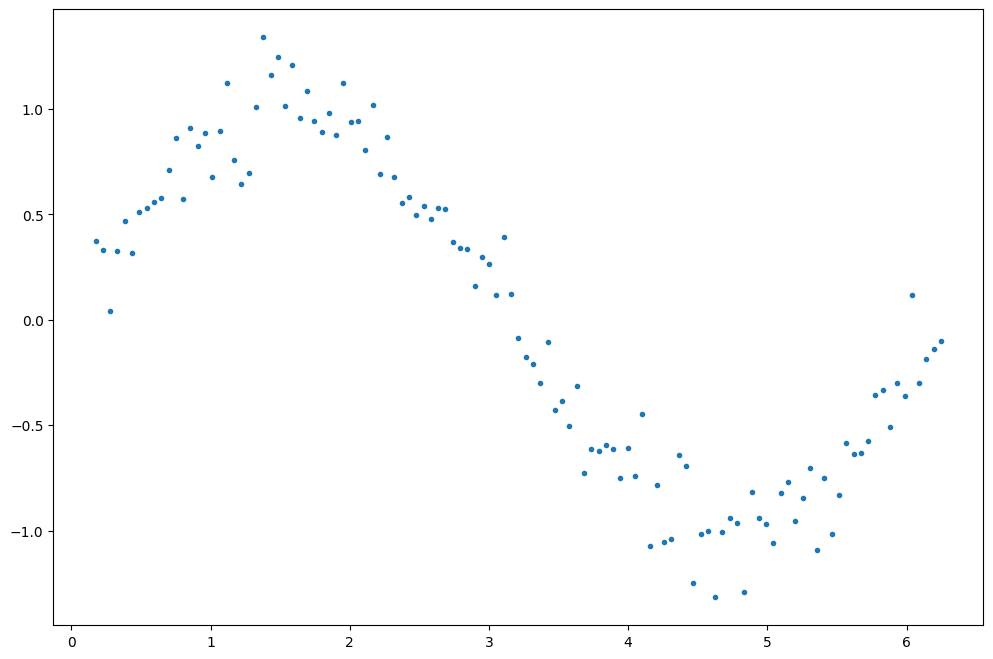

In [7]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.')

In [8]:
# polynomial regression with powers of x from 1 to 15
for i in range(2,16):  #power of 1 is already there, hence starting with 2
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


Creating test and train

In [9]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

## Linear Regression

In [10]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [11]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

Training Error 0.21314430958173897
Testing Error 0.18974033118165393


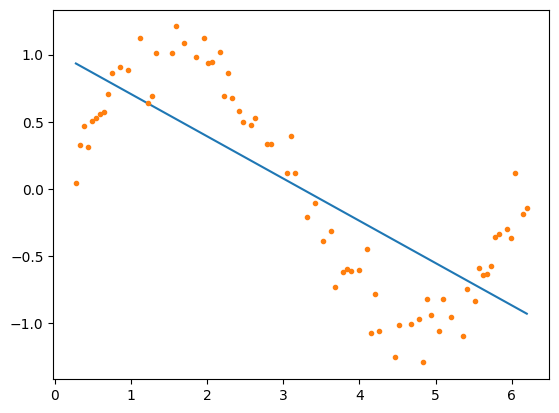

In [13]:
#Linear regression with one features
independent_variable_train = X_train[:,0:1]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:1]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

Training Error 0.021472481770965682
Testing Error 0.030451878881971598


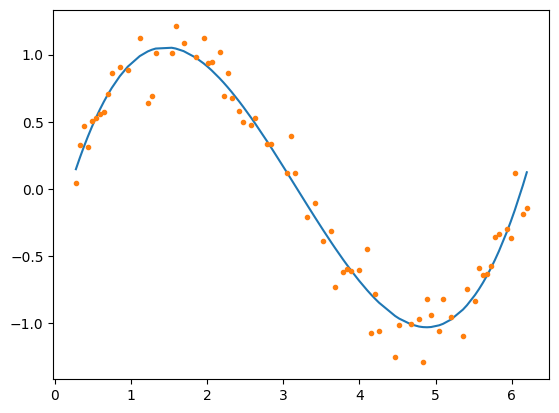

In [15]:
#Linear regression with three features
independent_variable_train = X_train[:,0:3]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:3]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

Training Error 0.01876434774571615
Testing Error 0.0321764450376928


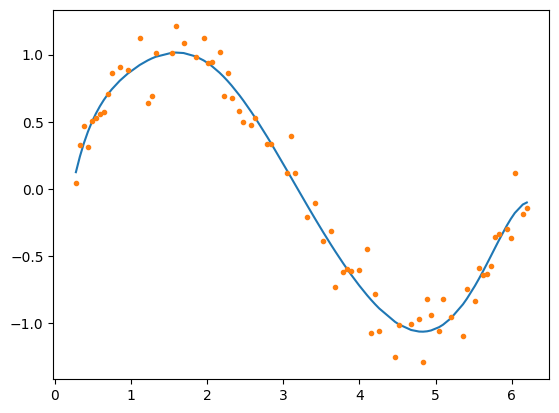

In [17]:
#Linear regression with Seven features
independent_variable_train = X_train[:,0:9]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:9]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

In [22]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):

    #Fit the model
    linreg = LinearRegression()
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)

    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)

        plt.plot(train_x[:,0:1],train_y,'.')

        plt.title('Number of Predictors: %d'%features)

    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]

    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])

    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)

    return ret

In [19]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [20]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

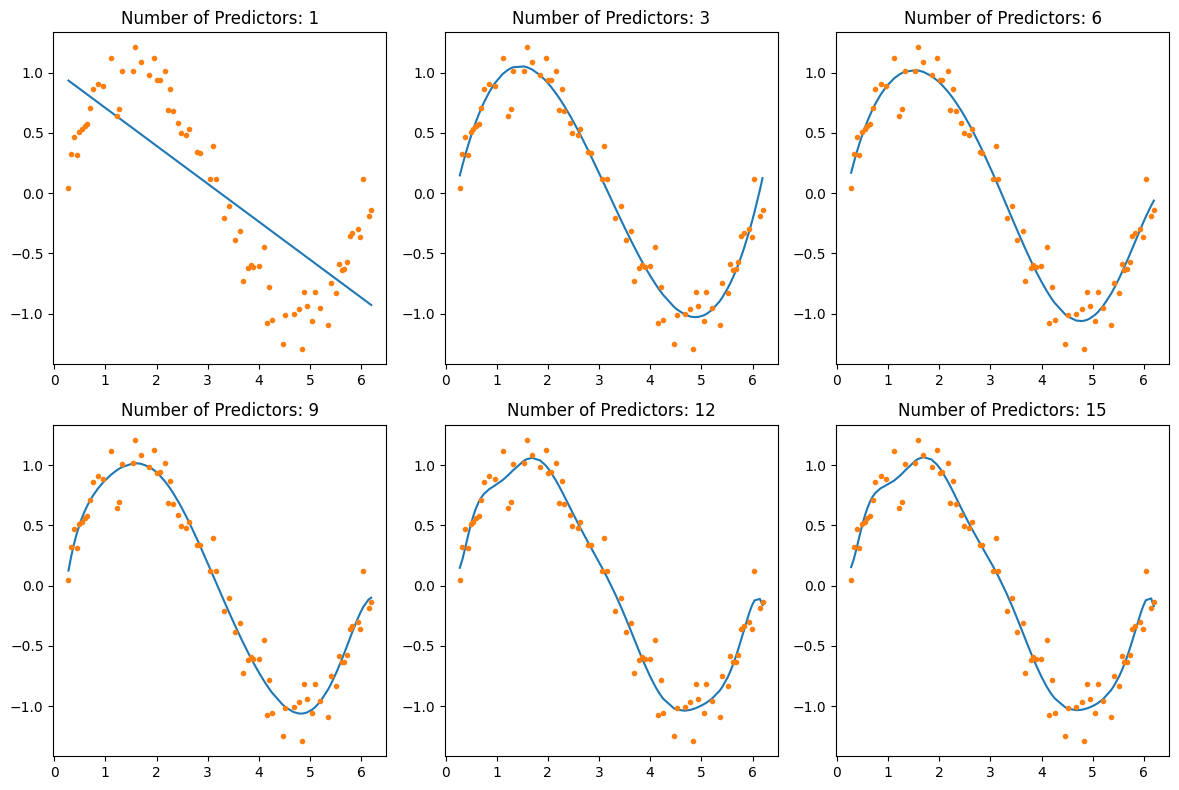

In [23]:
#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test

    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

In [24]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,1,-0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,1.1,-0.39,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.4,2.2,-0.99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.43,2.3,-1,0.12,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.096,1.2,0.0084,-0.29,0.069,-0.0043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.4,2.5,-1.6,0.66,-0.2,0.031,-0.0018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.38,2.4,-1.5,0.53,-0.15,0.021,-0.00067,-5.1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.85,5.1,-7,6,-3.1,0.92,-0.16,0.015,-0.00058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.94,5.7,-8.5,7.7,-4.3,1.4,-0.28,0.033,-0.002,5e-05,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-2.4,16,-38,50,-39,19,-6,1.2,-0.15,0.011,-0.00033,NaN,NaN,NaN,NaN,NaN


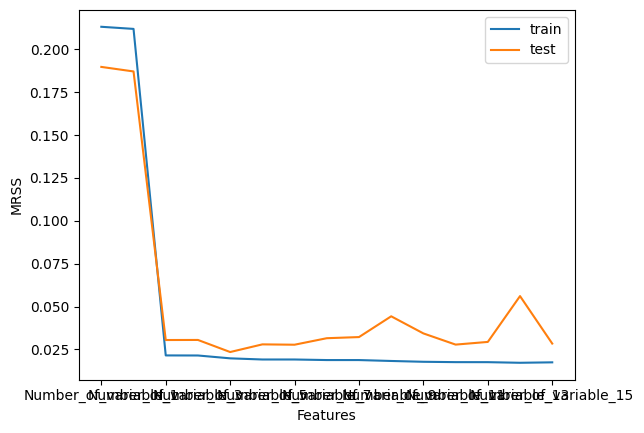

In [25]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

## Ridge

<img src="ridge.png">

In [26]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [27]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [32]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]

    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])

    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)

    return ret

In [29]:
#Initialize the dataframe for storing coefficients.
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [30]:
#Define the alpha value for which a plot is required:
models_to_plot = {0:231, 1e-4:232, 1e-3:233, 1e-2:234, 1:235, 5:236}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.13439e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.4516e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.45258e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.58138e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

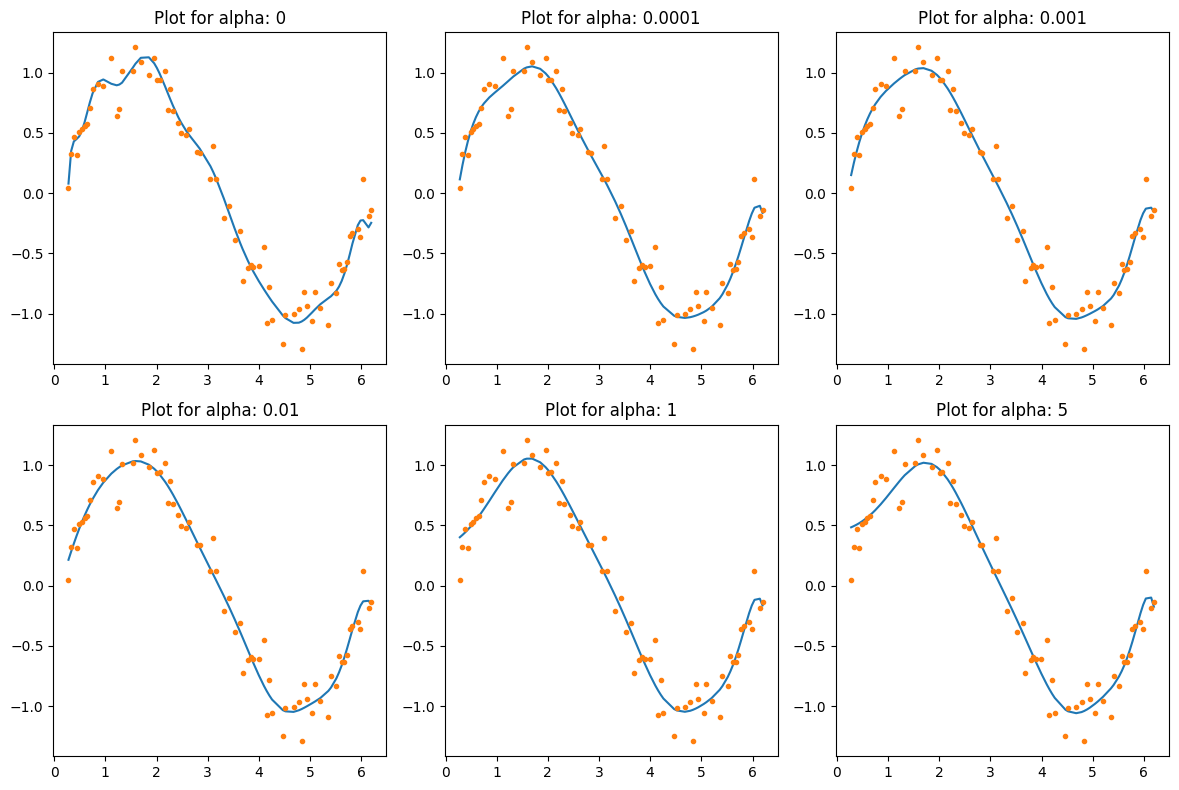

In [33]:
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i], models_to_plot)

In [34]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.017,0.2,-25,2.7e+02,-1.3e+03,3.3e+03,-5.4e+03,5.9e+03,-4.5e+03,2.5e+03,-1e+03,3e+02,-65,10,-1.2,0.086,-0.0039,7.9e-05
alpha_1e-08,0.017,0.033,-1.6,18,-93,2.9e+02,-5.4e+02,6.5e+02,-5.4e+02,3.1e+02,-1.3e+02,38,-8.2,1.3,-0.14,0.01,-0.00046,9.1e-06
alpha_0.0001,0.018,0.035,-0.73,3.5,-0.86,-3,0.86,3,-1.3,-2.4,3.1,-1.7,0.58,-0.12,0.017,-0.0016,8e-05,-1.8e-06
alpha_0.001,0.018,0.032,-0.53,2.8,-1,-1.4,0.57,1.2,-0.5,-0.91,1,-0.51,0.14,-0.025,0.0025,-0.00013,2.1e-06,6.9e-08
alpha_0.01,0.018,0.027,-0.18,1.4,0.064,-0.54,-0.19,0.29,0.19,-0.21,-0.097,0.19,-0.11,0.032,-0.0059,0.00066,-4.1e-05,1.1e-06
alpha_1,0.02,0.024,0.32,0.21,0.2,0.12,0.029,-0.046,-0.067,-0.0076,0.059,-0.03,0.004,0.0012,-0.00053,8.5e-05,-6.6e-06,2e-07
alpha_5,0.022,0.026,0.45,0.095,0.11,0.092,0.051,-0.0013,-0.04,-0.03,0.017,0.02,-0.02,0.0075,-0.0015,0.00019,-1.2e-05,3.3e-07
alpha_10,0.023,0.026,0.48,0.059,0.078,0.081,0.07,0.035,-0.022,-0.065,-0.022,0.092,-0.064,0.022,-0.0045,0.00054,-3.6e-05,1e-06
alpha_20,0.026,0.031,0.54,0.041,0.055,0.055,0.042,0.015,-0.015,-0.026,-0.0012,0.022,-0.014,0.0044,-0.00076,7.5e-05,-3.9e-06,8.1e-08
alpha_25,0.027,0.033,0.55,0.036,0.048,0.048,0.037,0.014,-0.012,-0.021,-0.0014,0.016,-0.0091,0.0024,-0.00031,1.8e-05,1.2e-08,-3.3e-08


In [35]:
coef_matrix_ridge['mrss_train']

alpha_0        0.017
alpha_1e-08    0.017
alpha_0.0001   0.018
alpha_0.001    0.018
alpha_0.01     0.018
alpha_1         0.02
alpha_5        0.022
alpha_10       0.023
alpha_20       0.026
alpha_25       0.027
Name: mrss_train, dtype: object

In [36]:
coef_matrix_ridge['mrss_test'].shape

(10,)

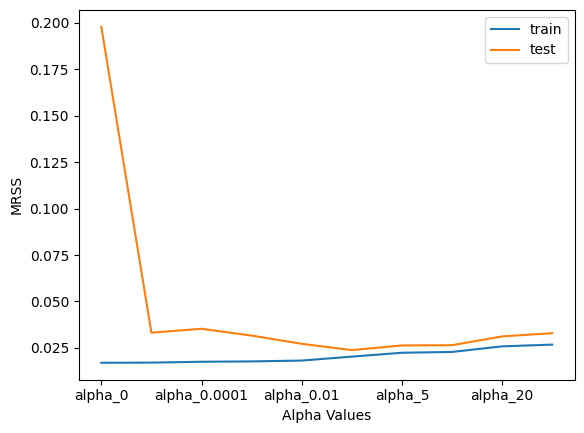

In [37]:
coef_matrix_ridge[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [38]:
alpha_ridge

[0, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20, 25]

In [39]:
#Printing number of zeros in each row of the coefficients dataset
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
alpha_25        0
dtype: int64

## Lasso

<img src="Lasso.png">

In [40]:
#Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [41]:
#Define the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [46]:
# defining a function which will fit lasso regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    if alpha == 0:
        lassoreg = LinearRegression()
        lassoreg.fit(train_x, train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)

    else:
        lassoreg = Lasso(alpha=alpha,normalize=True)
        lassoreg.fit(train_x,train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]

    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])

    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)

    return ret

In [43]:
#Initialize the dataframe to store coefficients
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [44]:
#Define the models to plot
models_to_plot = {0:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

TypeError: Lasso.__init__() got an unexpected keyword argument 'normalize'

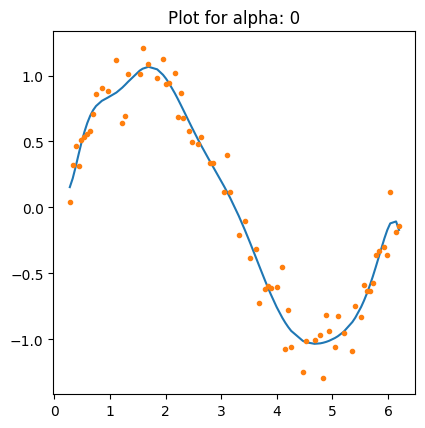

In [47]:
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot)

In [48]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.017,0.028,1.3,-13,50,-76,42,26,-59,46,-22,6.8,-1.5,0.22,-0.023,0.0015,-5.8e-05,1e-06
alpha_1e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


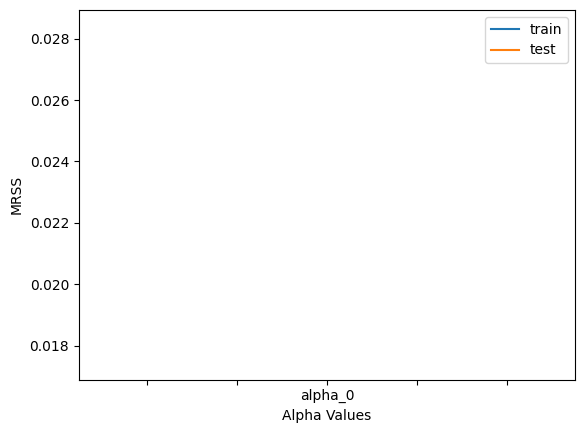

In [49]:
coef_matrix_lasso[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [50]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
dtype: int64